当按压深度较小时，压力与按压深度呈近似线性关系：
$$F=\frac{E}{h}\left(\pi R^2d-\frac{\pi}{3}d^3\right)$$


In [10]:
import numpy as np

E = 1.1 # Mpa
h = 2.6 # mm
R = 1.0 # mm
d = np.linspace(0,1.6,1000) # mm
F26 = np.linspace(0,0,1000)
F20 = np.linspace(0,0,1000)

for i in range(1000):
    F26[i] = E/h*(np.pi*R*d[i]*d[i]-np.pi/3*d[i]*d[i]*d[i])
h=2.0
for i in range(1000):
    F20[i] = E/h*(np.pi*R*d[i]*d[i]-np.pi/3*d[i]*d[i]*d[i])

In [21]:
# 读取csv
import csv
data = []
with open('../Data/TSET_singal/singal_49_685.csv','rt') as f:
    csv_reader = csv.reader(f)
    isHeader = True                 # 判断帧头
    for row in csv_reader:          # 将csv 文件中的数据保存到data中
        if isHeader:
            isHeader = False
            continue
        frame = {
            'time':row[0],
            'xyd':row[1:4],
            'press':row[4],
            'mag4':row[5:17]
            }
        data.append(frame)           # 将字典加入到data数组中
# 获取原始数据
import numpy as np

length = len(data)
# 获取磁场数据，触点水平位置数据和压力数据
depth = []
press = []
for i,frame in enumerate(data):
    if(frame['xyd'][0]=='0' and frame['xyd'][1]=='0'):
        press.append(float(frame['press']))
        depth.append(float(frame['xyd'][2]))
press = np.array(press)
depth = np.array(depth)





In [5]:
for i in press:
    print(i)

0.11994942504657233
0.12134248071642861
0.12134248071642861
0.12134248071642861
0.12170907431375921
0.12170907431375921
0.12178239303322534
0.12178239303322534
0.12178239303322534
0.12178239303322534
0.12178239303322534
0.12178239303322534
0.12229562406948817
0.12229562406948817
0.12280885510575101
0.12280885510575101
0.12280885510575101
0.12295549254468326
0.12295549254468326
0.12302881126414938
0.12302881126414938
0.12302881126414938
0.12302881126414938
0.12302881126414938
0.12302881126414938
0.12295549254468326
0.12295549254468326
0.12288217382521714
0.12288217382521714
0.12288217382521714
0.12222230535002206
0.12222230535002206
0.12222230535002206
0.12214898663055593
0.12214898663055593
0.12207566791108983
0.12207566791108983
0.12207566791108983
0.12170907431375921
0.12170907431375921
0.12170907431375921
0.12170907431375921
0.12170907431375921
0.12163575559429309
0.12163575559429309
0.12163575559429309
0.12156243687482697
0.12156243687482697
0.12156243687482697
0.12119584327749637


In [20]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
 
for font in font_manager.fontManager.ttflist:
    # 查看字体名以及对应的字体文件名
    print(font.name, '-', font.fname)

cmtt10 - c:\Users\11657\miniconda3\envs\dsp\lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmtt10.ttf
DejaVu Serif - c:\Users\11657\miniconda3\envs\dsp\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif-Bold.ttf
DejaVu Sans Display - c:\Users\11657\miniconda3\envs\dsp\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSansDisplay.ttf
DejaVu Serif - c:\Users\11657\miniconda3\envs\dsp\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif-BoldItalic.ttf
STIXNonUnicode - c:\Users\11657\miniconda3\envs\dsp\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXNonUniBol.ttf
STIXSizeOneSym - c:\Users\11657\miniconda3\envs\dsp\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizOneSymBol.ttf
STIXSizeThreeSym - c:\Users\11657\miniconda3\envs\dsp\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizThreeSymBol.ttf
STIXNonUnicode - c:\Users\11657\miniconda3\envs\dsp\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXNonUniBolIta.ttf
DejaVu Sans Mono - c:\Users\11657\minicon

0.11046105594590552


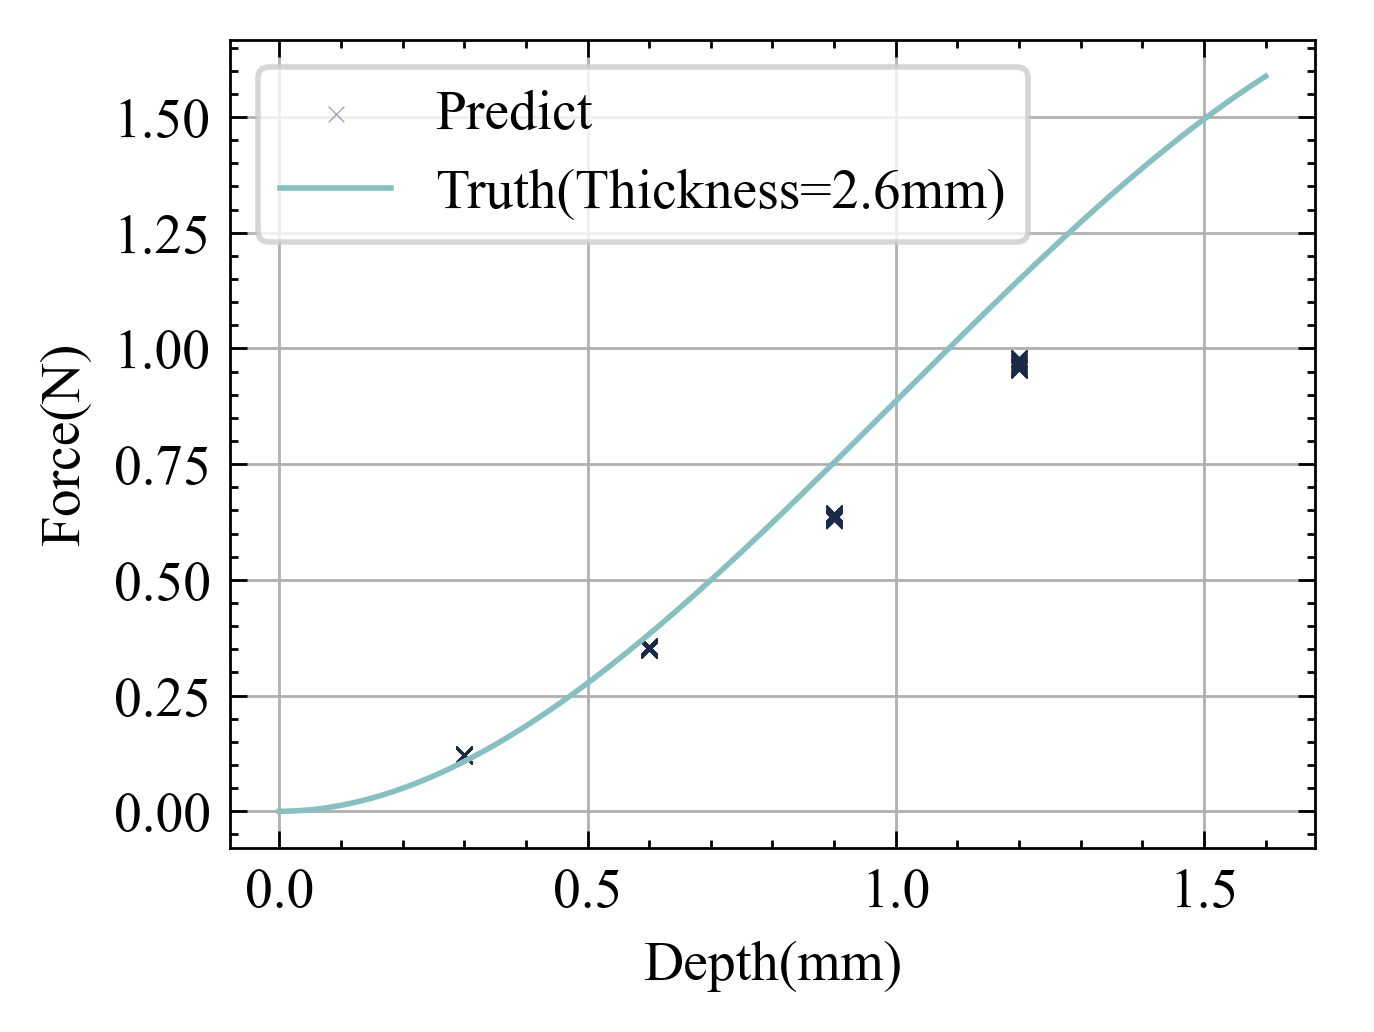

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scienceplots

# depth +=np.random.rand(len(depth))*0.02
color_table = ['#192947','#4081A4','#88C0C1','#B2D5C9']
font  = {'family': 'SimSun',
'weight': 'normal',
'size': 10,
}
with plt.style.context(['science']):
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 400 #图片像素
    plt.rcParams['figure.dpi'] = 400 #分辨率
    plt.rcParams["legend.frameon"] = True
    plt.rcParams['text.usetex'] = False
    plt.rc('font',family='Times New Roman') 
    plt.scatter(depth,press,s=8,label='Predict',color=color_table[0],alpha=0.5,linewidths=0.2,marker='x' )

    plt.plot(d,F26,color=color_table[2],label='Truth(Thickness=2.6mm)')
    plt.grid()
    plt.legend()
    plt.xlabel('Depth(mm)')
    plt.ylabel('Force(N)')
    
    rs = 0
    for i in range(len(depth)):
        h = 2.6
        dd = depth[i]
        fmd = E/h*(np.pi*R*dd*dd-np.pi/3*dd*dd*dd)
        rs+=(press[i]-fmd)*(press[i]-fmd)
    rs = np.sqrt(rs/(len(depth)-1))
    print(rs)
plt.show()

In [13]:
# 读取csv
import csv
data = []
with open('../Data/TSET_squ1803/squ1803_T2.0_C1.0.csv','rt') as f:
    csv_reader = csv.reader(f)
    isHeader = True                 # 判断帧头
    for row in csv_reader:          # 将csv 文件中的数据保存到data中
        if isHeader:
            isHeader = False
            continue
        frame = {
            'time':row[0],
            'xyd':row[1:4],
            'press':row[4],
            'mag4':row[5:17]
            }
        data.append(frame)           # 将字典加入到data数组中
# 获取原始数据
import numpy as np

length = len(data)
# 获取磁场数据，触点水平位置数据和压力数据
depth = []
press = []
for i,frame in enumerate(data):
    if(frame['xyd'][0]=='0.0' and frame['xyd'][1]=='9.0'):
        press.append(float(frame['press']))
        depth.append(float(frame['xyd'][2]))
press = np.array(press)
depth = np.array(depth)

print(depth)



[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.

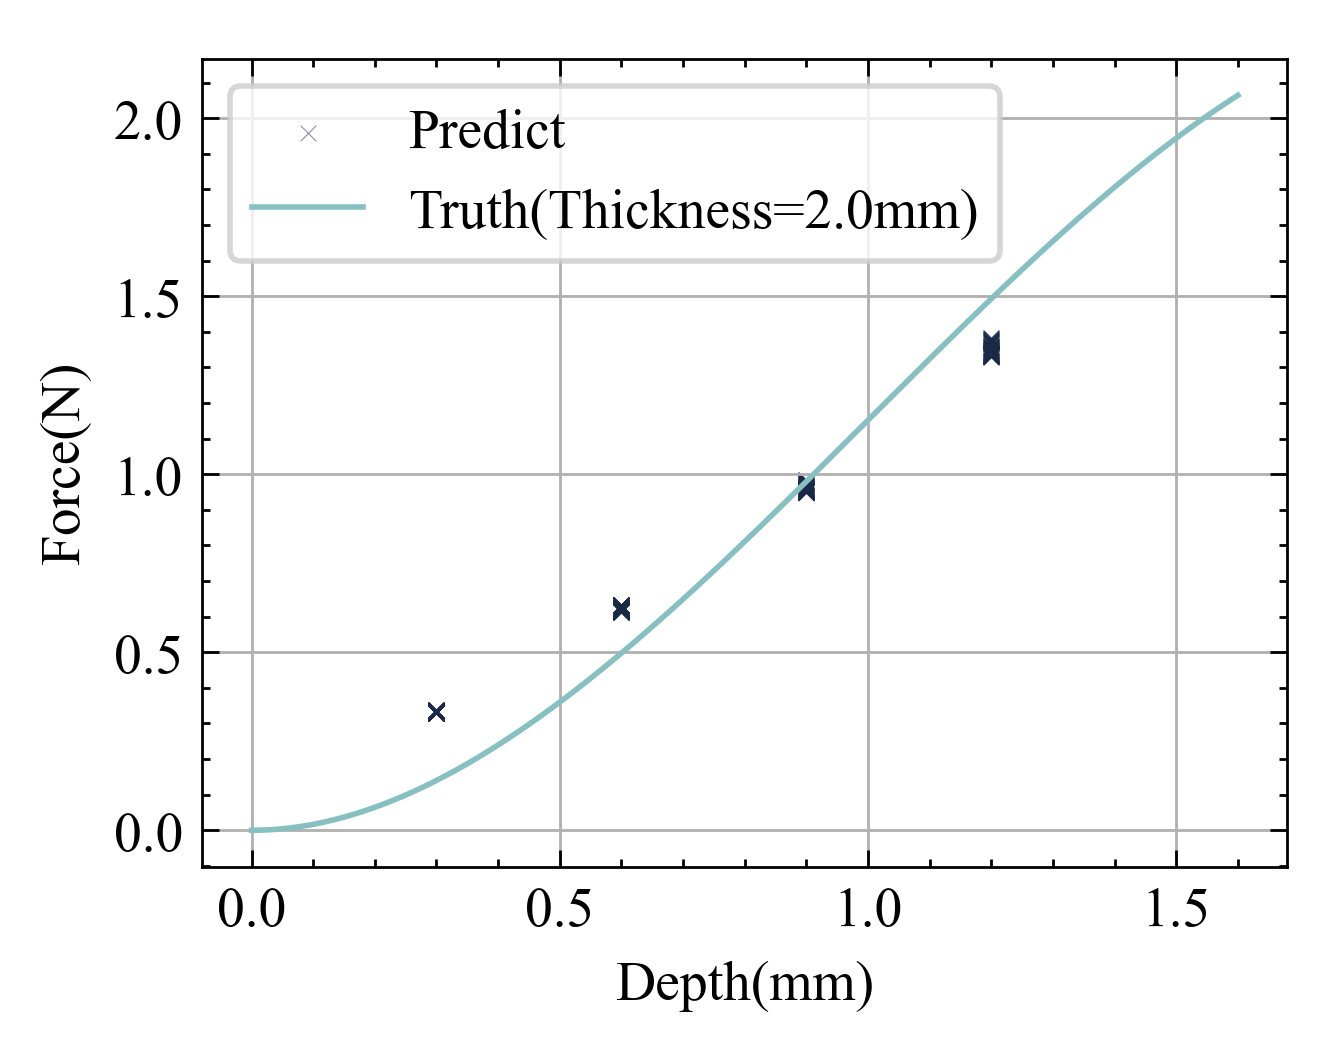

0.13588111369218903


In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scienceplots

# depth +=np.random.rand(len(depth))*0.02
color_table = ['#192947','#4081A4','#88C0C1','#B2D5C9']
font  = {'family': 'SimSun',
'weight': 'normal',
'size': 10,
}
with plt.style.context(['science']):
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 400 #图片像素
    plt.rcParams['figure.dpi'] = 400 #分辨率
    plt.rcParams["legend.frameon"] = True
    plt.rcParams['text.usetex'] = False
    plt.rc('font',family='Times New Roman') 
    plt.scatter(depth,press,s=8,label='Predict',color=color_table[0],alpha=0.5,linewidths=0.2,marker='x' )

    plt.plot(d,F20,color=color_table[2],label='Truth(Thickness=2.0mm)')
    plt.grid()
    plt.legend()
    plt.xlabel('Depth(mm)')
    plt.ylabel('Force(N)')

rs = 0
for i in range(len(depth)):
    h = 2.0
    dd = depth[i]
    fmd = E/h*(np.pi*R*dd*dd-np.pi/3*dd*dd*dd)
    rs+=(press[i]-fmd)*(press[i]-fmd)
rs = np.sqrt(rs/(len(depth)-1))
plt.show()
print(rs)

In [17]:
h = 2.0
for dd in [0.3,0.6,0.9,1.2]:
    print(E/h*(np.pi*R*dd*dd-np.pi/3*dd*dd*dd))

0.13995795271742528
0.49762827632862333
0.9797056690219772
1.4928848289858703
